<a href="https://colab.research.google.com/github/3igtem/Regression-Diamond-Prices-Prediction/blob/main/Regression_Diamond_Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Visualization
import seaborn as sns

#tran
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [4]:
refData = pd.read_csv('https://raw.githubusercontent.com/3igtem/Regression-Diamond-Prices-Prediction/main/dataset/diamonds.csv')

In [5]:
df = refData.copy()
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# HealthCheck

In [6]:
class HealthCheck:
    def __init__(self):
        pass
    
    def summary_tbl(self, data: pd.DataFrame) -> pd.DataFrame:
        result = pd.DataFrame({
            "dtype":data.dtypes.values,
            "cnt_missing":data.isna().sum(),
            "ratio_missing":(data.isna().sum()/data.shape[0])*100,
            "n_unique":data.nunique(),
            "ratio_unique":(data.nunique()/data.shape[0])*100
        }, 
            index=data.columns, 
        )
        return result

    def summary(self, data: pd.DataFrame) -> str:
        """
        Quick summary for data quality  
        
        :param pd.DataFrame data: data needed to be checked
        :returns: a summary table
        :rtype: str
        """
        summary_df = self.summary_tbl(data=data)
        columns = summary_df.index
        for column in columns:
            if data[column].dtypes == "object":
                least = data[column].value_counts().index[-1]
                most = data[column].value_counts().index[0]
            elif data[column].dtypes == "datetime":
                least = data[column].value_counts().index[-1]
                most = data[column].value_counts().index[0]
            elif data[column].dtypes == "category":
                least = data[column].astype("object").value_counts().index[-1]
                most = data[column].astype("object").value_counts().index[0]                
            else:
                least = data[column].min()
                most = data[column].max()
        
            summary_df.loc[column,"least"] = least
            summary_df.loc[column,"most"] = most
        print(summary_df.round(2).to_markdown())
        print("\n")
        print(f"row: {data.shape[0]}, col: {data.shape[1]}")

#EDA

In [7]:
hc = HealthCheck()

In [8]:
hc.summary(df)

|            | dtype   |   cnt_missing |   ratio_missing |   n_unique |   ratio_unique | least   | most    |
|:-----------|:--------|--------------:|----------------:|-----------:|---------------:|:--------|:--------|
| Unnamed: 0 | int64   |             0 |               0 |      53940 |         100    | 1.0     | 53940.0 |
| carat      | float64 |             0 |               0 |        273 |           0.51 | 0.2     | 5.01    |
| cut        | object  |             0 |               0 |          5 |           0.01 | Fair    | Ideal   |
| color      | object  |             0 |               0 |          7 |           0.01 | J       | G       |
| clarity    | object  |             0 |               0 |          8 |           0.01 | I1      | SI1     |
| depth      | float64 |             0 |               0 |        184 |           0.34 | 43.0    | 79.0    |
| table      | float64 |             0 |               0 |        127 |           0.24 | 43.0    | 95.0    |
| price      | int6

- Why x y z has: 0 

In [15]:
print('Cut Sum:',df['cut'].nunique())
df['cut'].unique()

Cut Sum: 5


array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [14]:
print('Color Sum:',df['color'].nunique())
df['color'].unique()

Color Sum: 7


array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

- worst color to best color -> J, I, H, G, F, E, D 

In [16]:
print('Clarity Sum:',df['clarity'].nunique())
df['clarity'].unique()

Clarity Sum: 8


array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

- worst clarity to best clarity -> I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF

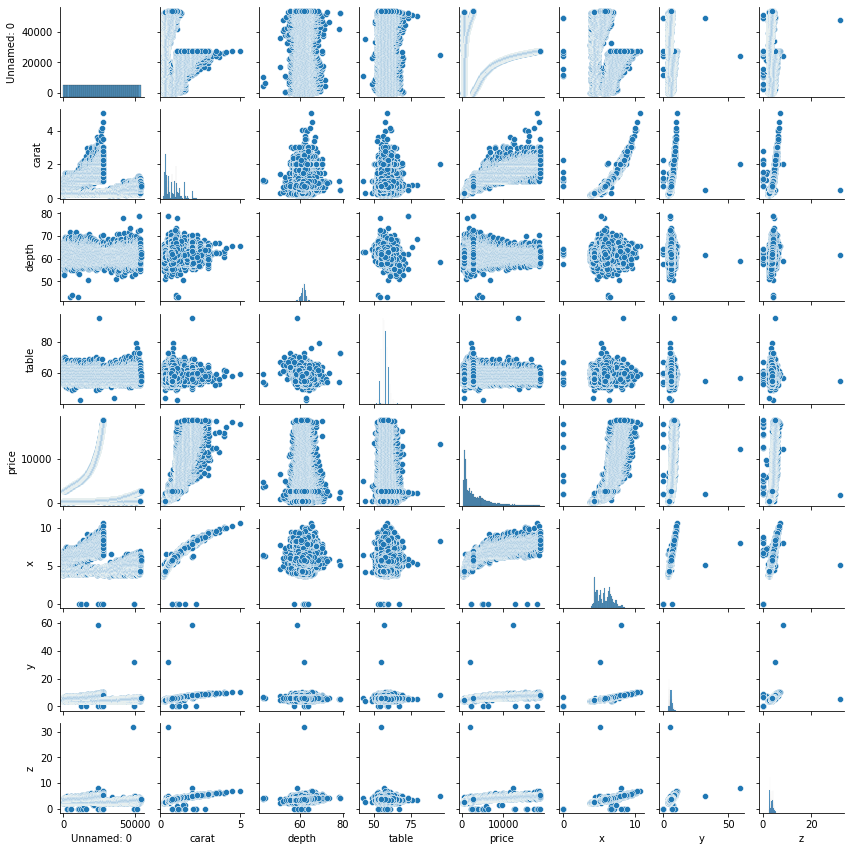

In [18]:
sns.pairplot(df, height=1.5)

In [25]:
objectType = (df.dtypes =="object")
object_cols = list(objectType[objectType].index)
print(object_cols)

# Make copy to avoid changing original data 
dataEn = df.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    dataEn[col] = label_encoder.fit_transform(dataEn[col])
dataEn.describe()

['cut', 'color', 'clarity']


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,2.553003,2.594197,3.835150,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.027708,1.701105,1.724591,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000
